In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/email-spam-detection-sentiment-analysis/emails.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics
import warnings
warnings.filterwarnings('ignore')
print("setup complete")

setup complete


In [3]:
df = pd.read_csv('/kaggle/input/email-spam-detection-sentiment-analysis/emails.csv')

In [4]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [5]:
df.shape

(5728, 2)

In [6]:
df.spam.value_counts()

0    4360
1    1368
Name: spam, dtype: int64

In [7]:
df.iloc[0,0]

"Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  ma

In [8]:
df.isna().sum()

text    0
spam    0
dtype: int64

In [9]:
df.duplicated().sum()

33

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df = df.rename(columns={'spam':'label'})

In [12]:
df.describe(include='all')

,text,label
count,5695,5695.000000
unique,5695,NaN
top,Subject: naturally irresistible your corporate...,NaN
freq,1,NaN
mean,NaN,0.240211
std,NaN,0.427249
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,0.000000
75%,NaN,0.000000


In [13]:
df['length'] = df['text'].apply(len)

In [14]:
df.head()

,text,label,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


<AxesSubplot:>

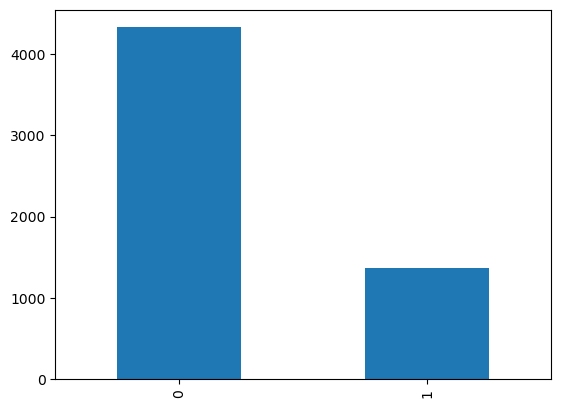

In [15]:
df['label'].value_counts().head(10).plot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

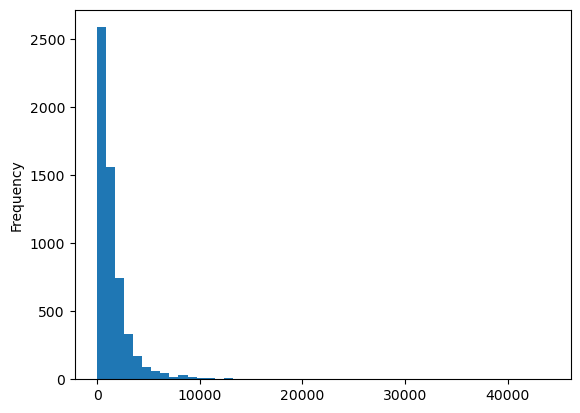

In [16]:
df['length'].plot(kind='hist',bins=50)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
count_vect = CountVectorizer()
x_Count = count_vect.fit_transform(df.text)
x_Count.shape

(5695, 37303)

In [18]:
x_train, x_test, y_train, y_test= train_test_split(x_Count,df['label'],test_size=0.2,random_state=1)

In [19]:
print(x_train.shape)
print(x_test.shape)

(4556, 37303)
(1139, 37303)


In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier

In [21]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([
     ('tfidf', TfidfTransformer()),
     ('clf', MultinomialNB()),
])

In [22]:
text_clf.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])

In [23]:
mt = MultinomialNB()
mt.fit(x_train,y_train)
mt_pred = mt.predict(x_test)
print(mt_pred)

[0 0 0 ... 1 1 0]


In [24]:
print("MultinomialNB")
print("Accuracy score: {}". format(accuracy_score(y_test, mt_pred)) )
print("Precision score: {}". format(precision_score(y_test, mt_pred)) )
print("Recall score: {}". format(recall_score(y_test, mt_pred)))
print("F1 score: {}". format(f1_score(y_test, mt_pred)))

MultinomialNB
Accuracy score: 0.9894644424934153
Precision score: 0.9711191335740073
Recall score: 0.9853479853479854
F1 score: 0.9781818181818183


In [25]:
from sklearn.neural_network import MLPClassifier
mlcp = MLPClassifier()
mlcp.fit(x_train,y_train)
mlcp_pred = mlcp.predict(x_test)
print(mlcp_pred)

[0 0 0 ... 1 1 0]


In [26]:
print("MLPClassifier")
print("Accuracy score: {}". format(accuracy_score(y_test, mlcp_pred)) )
print("Precision score: {}". format(precision_score(y_test, mlcp_pred)) )
print("Recall score: {}". format(recall_score(y_test, mlcp_pred)))
print("F1 score: {}". format(f1_score(y_test, mlcp_pred)))

MLPClassifier
Accuracy score: 0.9920983318700615
Precision score: 0.9925373134328358
Recall score: 0.9743589743589743
F1 score: 0.9833641404805914


In [27]:
from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier(loss='hinge', penalty='l2',
                           alpha=1e-3, random_state=42,
                           max_iter=5, tol=None)
sgdc.fit(x_train,y_train)
sgdc_pred = sgdc.predict(x_test)
print(sgdc_pred)

[0 0 0 ... 1 1 0]


In [28]:
print("SGDClassifier")
print("Accuracy score: {}". format(accuracy_score(y_test, sgdc_pred)) )
print("Precision score: {}". format(precision_score(y_test, sgdc_pred)) )
print("Recall score: {}". format(recall_score(y_test, sgdc_pred)))
print("F1 score: {}". format(f1_score(y_test, sgdc_pred)))

SGDClassifier
Accuracy score: 0.9798068481123793
Precision score: 0.9496402877697842
Recall score: 0.967032967032967
F1 score: 0.9582577132486387


In [29]:
from sklearn.naive_bayes import BernoulliNB
ber = BernoulliNB()
ber.fit(x_train,y_train)
ber_pred = ber.predict(x_test)
print(ber_pred)

[0 0 0 ... 1 1 0]


In [30]:
print("BernoulliNB")
print("Accuracy score: {}". format(accuracy_score(y_test, ber_pred)) )
print("Precision score: {}". format(precision_score(y_test, ber_pred)) )
print("Recall score: {}". format(recall_score(y_test, ber_pred)))
print("F1 score: {}". format(f1_score(y_test, ber_pred)))

BernoulliNB
Accuracy score: 0.9859525899912204
Precision score: 0.974169741697417
Recall score: 0.967032967032967
F1 score: 0.9705882352941176
